<a href="https://colab.research.google.com/github/KIM-sang-won/Pareto-Front-Optimization-of-Variance-added-Expected-Loss-with-Interrelated-Qualities-Python_Code-/blob/main/Pareto_Front_Optimization_of_Variance_added_Expected_Loss_with_Interrelated_Qualities_%5BPython_code%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

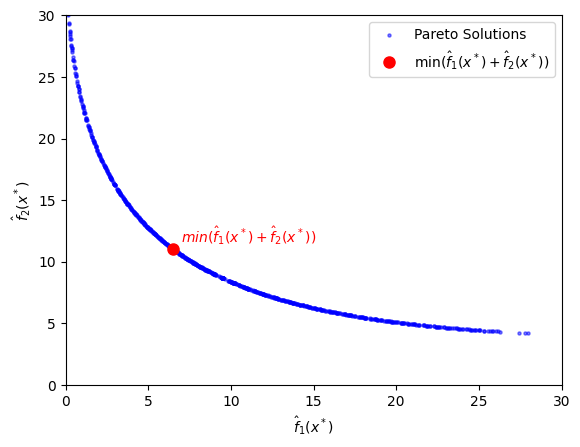

Solution 1: m = 25.80, s = 4.39, x = [-0.15351849 -0.15351849]
Solution 2: m = 27.82, s = 4.24, x = [-0.12096267 -0.12096267]
Solution 3: m = 27.99, s = 4.23, x = [-0.11818109 -0.11818109]
Solution 4: m = 27.41, s = 4.26, x = [-0.12739448 -0.12739448]
Solution 5: m = 26.29, s = 4.35, x = [-0.14549424 -0.14549424]
Solution 6: m = 24.69, s = 4.49, x = [-0.17182057 -0.17182057]
Solution 7: m = 22.48, s = 4.73, x = [-0.20973582 -0.20973582]
Solution 8: m = 19.72, s = 5.15, x = [-0.25995059 -0.25995059]
Solution 9: m = 16.78, s = 5.77, x = [-0.31732831 -0.31732831]
Solution 10: m = 13.56, s = 6.74, x = [-0.38633002 -0.38633002]
Solution 11: m = 10.48, s = 8.11, x = [-0.46049019 -0.46049019]
Solution 12: m = 7.73, s = 9.93, x = [-0.53649608 -0.53649608]
Solution 13: m = 0.00, s = 36.00, x = [-1. -1.]
Solution 14: m = 0.00, s = 36.00, x = [-1. -1.]
Solution 15: m = 0.00, s = 36.00, x = [-1. -1.]
Solution 16: m = 0.00, s = 36.00, x = [-1. -1.]
Solution 17: m = 0.00, s = 36.00, x = [-1. -1.]
So

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Mean response function (m) and standard deviation function (s)
def mean_response(x):
    x1, x2 = x
    return (3 * x1 + 3 * x2 + 6) ** 2

def std_dev_response(x):
    x1, x2 = x
    return ((x1 + x2) ** 2 + 2) ** 2

def objective(x, p1, p2):
    return (abs(mean_response(x)) / 100) ** p1 + (abs(std_dev_response(x)) / 100) ** p2

# Optimization settings
bounds = [(-1, 1), (-1, 1)]
initial_x = [0, 0]

# List to store Pareto solutions
pareto_solutions = []

# Try various combinations of p1 and p2
p1_values = np.arange(0.05, 3, 0.1)
p2_values = np.arange(0.05, 3, 0.1)

for p1 in p1_values:
    for p2 in p2_values:
        result = minimize(objective, initial_x, args=(p1, p2), bounds=bounds, method='SLSQP')
        if result.success:
            m_opt = mean_response(result.x)
            s_opt = std_dev_response(result.x)
            x_opt = result.x
            pareto_solutions.append((m_opt, s_opt, x_opt))

# Find the solution with the smallest sum of m + s
min_sum_solution = min(pareto_solutions, key=lambda tup: tup[0] + tup[1])
m_min, s_min, x_min = min_sum_solution

# Visualize the results
if pareto_solutions:
    m_values, s_values, x_values = zip(*pareto_solutions)
    plt.scatter(m_values, s_values, s=5, color='b', alpha=0.5, label='Pareto Solutions')
    plt.plot(m_min, s_min, 'ro', label=r'min$(\hat{f}_1(x^*) + \hat{f}_2(x^*))$', markersize=8)
    plt.text(m_min + 0.5, s_min + 0.5, r"$min (\hat{f}_1(x^*) + \hat{f}_2(x^*) )$", fontsize=10, color='red')
    plt.ylabel(r"$\hat{f}_2(x^*)$")
    plt.xlabel(r"$\hat{f}_1(x^*)$")
    plt.xlim(0, 30)
    plt.ylim(0, 30)
    plt.legend()
    plt.show()

# Print all optimized solutions
for i, (m, s, x) in enumerate(pareto_solutions):
    print(f"Solution {i+1}: m = {m:.2f}, s = {s:.2f}, x = {x}")

print("\n✅ Solution with the smallest value of m + s:")
print(f"m = {m_min:.2f}, s = {s_min:.2f}, m + s = {m_min + s_min:.2f}, x = {x_min}")


In [2]:
# Tolerance threshold
tolerance = 1e-1

# Store solutions based on specific conditions
equal_ms = []    # Solutions where m ≈ s
double_s = []    # Solutions where m ≈ 2s
half_s = []      # Solutions where m ≈ 0.5s

for m, s, x in pareto_solutions:
    if abs(m - s) < tolerance:
        equal_ms.append((m, s, x))
    if abs(m - 2 * s) < tolerance:
        double_s.append((m, s, x))
    if abs(m - 0.5 * s) < tolerance:
        half_s.append((m, s, x))

# Print results
def print_solutions(title, solutions):
    print(f"\n📌 {title}")
    if not solutions:
        print("  No solution satisfies this condition.")
    for i, (m, s, x) in enumerate(solutions):
        print(f"  - Solution {i+1}: m = {m:.2f}, s = {s:.2f}, x = {x}")

print_solutions("m ≈ s", equal_ms)
print_solutions("m ≈ 2s", double_s)
print_solutions("m ≈ 0.5s", half_s)



📌 m ≈ s
  - Solution 1: m = 8.97, s = 9.02, x = [-0.50094752 -0.50094752]
  - Solution 2: m = 8.95, s = 9.03, x = [-0.50128534 -0.50128534]
  - Solution 3: m = 8.97, s = 9.02, x = [-0.5008871 -0.5008871]
  - Solution 4: m = 8.98, s = 9.01, x = [-0.50045229 -0.50045229]
  - Solution 5: m = 9.01, s = 9.00, x = [-0.49983938 -0.49983938]
  - Solution 6: m = 9.04, s = 8.97, x = [-0.49882764 -0.49882764]
  - Solution 7: m = 9.00, s = 9.00, x = [-0.49992543 -0.49992543]
  - Solution 8: m = 9.01, s = 8.99, x = [-0.49967447 -0.49967447]
  - Solution 9: m = 9.03, s = 8.98, x = [-0.49929577 -0.49929577]

📌 m ≈ 2s
  - Solution 1: m = 13.56, s = 6.74, x = [-0.38633002 -0.38633002]
  - Solution 2: m = 13.50, s = 6.77, x = [-0.38773157 -0.38773157]
  - Solution 3: m = 13.52, s = 6.76, x = [-0.38714114 -0.38714114]

📌 m ≈ 0.5s
  - Solution 1: m = 5.90, s = 11.67, x = [-0.59511136 -0.59511136]
  - Solution 2: m = 5.82, s = 11.77, x = [-0.5979648 -0.5979648]
  - Solution 3: m = 5.84, s = 11.74, x = [-0

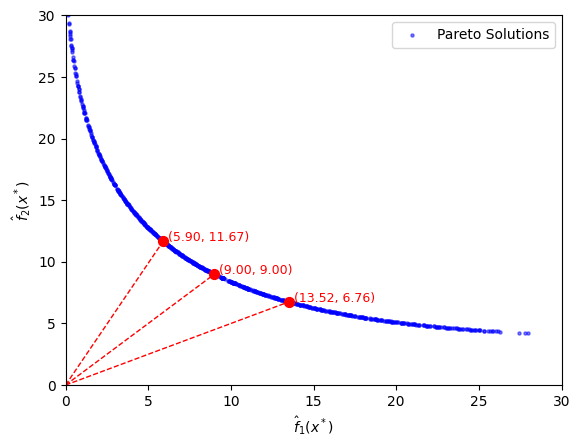

In [3]:
import matplotlib.pyplot as plt
import numpy as np

if pareto_solutions:
    # Unpack Pareto-optimal values
    m_values, s_values, x_values = zip(*pareto_solutions)

    # Scatter plot of Pareto-optimal solutions
    plt.scatter(m_values, s_values, s=5, color='b', alpha=0.5, label='Pareto Solutions')

    # Three specific points of interest
    special_points = [
        (9.00, 9.00),       # f1 = f2 = 9.00
        (13.52, 6.76),      # f1 = 13.52, f2 = 6.76
        (5.90, 11.67)       # f1 = 5.90, f2 = 11.67
    ]

    # Plot the special points
    sp_m, sp_s = zip(*special_points)
    plt.scatter(sp_m, sp_s, s=50, color='r', marker='o')

    # Draw dashed lines from the origin to each special point
    origin = np.array([0, 0])
    for point in special_points:
        point_arr = np.array(point)
        plt.plot([origin[0], point_arr[0]], [origin[1], point_arr[1]], 'r--', linewidth=1)
        # Annotate each point with its (f1, f2) values
        plt.text(point_arr[0] + 0.3, point_arr[1], f"({point_arr[0]:.2f}, {point_arr[1]:.2f})",
                 fontsize=9, color='r')

    # Axis labels
    plt.ylabel(r"$\hat{f}_2(x^*)$")
    plt.xlabel(r"$\hat{f}_1(x^*)$")
    plt.xlim(0, 30)
    plt.ylim(0, 30)
    plt.legend()
    plt.show()


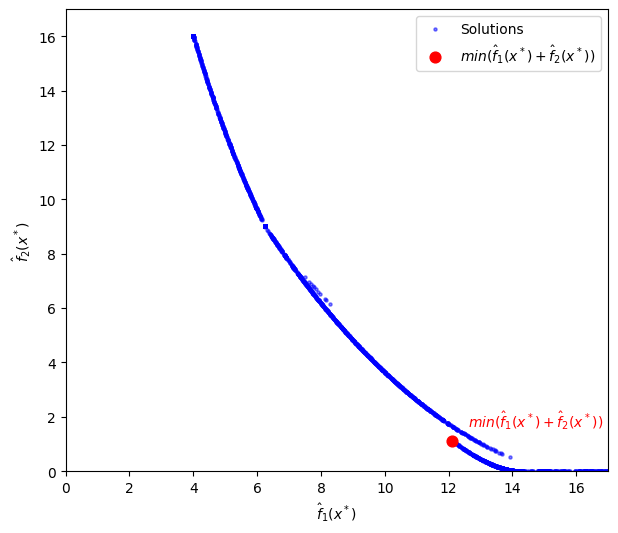

✅ Minimum Total Risk T = f₁ + f₂: 13.23314
Corresponding mean (m): 12.11403
Corresponding std deviation (s): 1.11911
Corresponding input x: [1.         0.0020883  0.01929489]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Mean response function (m) and standard deviation response function (s)
def mean_response(x):
    x1, x2, x3 = x
    return (0.5*x1**2 - 0.5*x2**2 + 0.5*x3**2 + x1*x3 - 4)**2

def std_dev_response(x):
    x1, x2, x3 = x
    return (x1**2 - x2**2 + 3*x3)**2

# Objective function: m^p1 + s^p2 (normalized)
def objective(x, p1, p2):
    return (abs(mean_response(x))/100)**p1 + (abs(std_dev_response(x))/100)**p2

# Optimization settings
bounds = [(-1, 1), (-1, 1), (-1, 1)]
initial_x = [1, 1, 1]

# List to store Pareto-optimal solutions
pareto_solutions = []

# Try various combinations of p1 and p2
p1_values = np.arange(0.05, 3, 0.05)
p2_values = np.arange(0.05, 3, 0.05)

for p1 in p1_values:
    for p2 in p2_values:
        result = minimize(objective, initial_x, args=(p1, p2), bounds=bounds, method='SLSQP')
        if result.success:
            m_opt = mean_response(result.x)
            s_opt = std_dev_response(result.x)
            x_opt = result.x
            pareto_solutions.append((m_opt, s_opt, x_opt))

# Visualization and marking the point with minimum total risk T = m + s
if pareto_solutions:
    m_values, s_values, x_values = zip(*pareto_solutions)
    m_values = [abs(m) for m in m_values]
    s_values = [abs(s) for s in s_values]

    # Find the index with the minimum total risk
    total_risks = [m + s for m, s in zip(m_values, s_values)]
    min_index = np.argmin(total_risks)
    min_m = m_values[min_index]
    min_s = s_values[min_index]

    # Plot the results
    plt.figure(figsize=(7, 6))
    plt.scatter(m_values, s_values, s=5, color='b', alpha=0.5, label='Solutions')
    plt.scatter(min_m, min_s, color='red', s=60, label=r'$min (\hat{f}_1(x^*) + \hat{f}_2(x^*) )$', zorder=5)
    plt.text(min_m + 0.5, min_s + 0.5, r"$min (\hat{f}_1(x^*) + \hat{f}_2(x^*) )$", fontsize=10, color='red')
    plt.ylabel(r"$\hat{f}_2(x^*)$")
    plt.xlabel(r"$\hat{f}_1(x^*)$")
    plt.xlim(0, 17)
    plt.ylim(0, 17)
    plt.legend()
    plt.show()

    # Print the result with the smallest total risk
    print(f"✅ Minimum Total Risk T = f₁ + f₂: {min_m + min_s:.5f}")
    print(f"Corresponding mean (m): {min_m:.5f}")
    print(f"Corresponding std deviation (s): {min_s:.5f}")
    print(f"Corresponding input x: {x_values[min_index]}")


In [5]:
import numpy as np

# Target ratio conditions
ratios = [1, 2, 0.5]
tolerance = 0.01  # Allowed approximation tolerance

# Dictionary to store selected points for each ratio
selected_points_by_ratio = {r: [] for r in ratios}

for m, s, x in pareto_solutions:
    m_abs = abs(m)
    s_abs = abs(s)
    if s_abs == 0:  # Avoid division by zero
        continue
    ratio = m_abs / s_abs
    for target_ratio in ratios:
        if abs(ratio - target_ratio) < tolerance:
            selected_points_by_ratio[target_ratio].append((m_abs, s_abs, x, ratio))
            break

# Print the results
for r in ratios:
    print(f"\n🔎 Points where f1/f2 ≈ {r}:")
    if not selected_points_by_ratio[r]:
        print("  No points satisfy this condition.")
    for idx, (m_val, s_val, x_val, actual_ratio) in enumerate(selected_points_by_ratio[r]):
        print(f"  • Point {idx+1}: f1 = {m_val:.4f}, f2 = {s_val:.4f}, ratio = {actual_ratio:.4f}, x = {x_val}")



🔎 Points where f1/f2 ≈ 1:
  • Point 1: f1 = 7.2588, f2 = 7.2967, ratio = 0.9948, x = [1.         1.         0.90041624]
  • Point 2: f1 = 7.2660, f2 = 7.2853, ratio = 0.9973, x = [1.        1.        0.8997123]
  • Point 3: f1 = 7.2953, f2 = 7.2391, ratio = 1.0078, x = [1.         1.         0.89685415]
  • Point 4: f1 = 7.2916, f2 = 7.2449, ratio = 1.0064, x = [1.         1.         0.89721012]
  • Point 5: f1 = 7.2916, f2 = 7.2449, ratio = 1.0064, x = [1.         1.         0.89721148]
  • Point 6: f1 = 7.2840, f2 = 7.2568, ratio = 1.0037, x = [1.         1.         0.89794935]
  • Point 7: f1 = 7.2810, f2 = 7.2617, ratio = 1.0027, x = [1.         1.         0.89824946]
  • Point 8: f1 = 7.2781, f2 = 7.2662, ratio = 1.0016, x = [1.         1.         0.89852662]
  • Point 9: f1 = 7.2933, f2 = 7.2423, ratio = 1.0070, x = [1.         1.         0.89704927]

🔎 Points where f1/f2 ≈ 2:
  • Point 1: f1 = 9.1856, f2 = 4.5906, ratio = 2.0010, x = [1.         1.         0.71419044]
  • Point

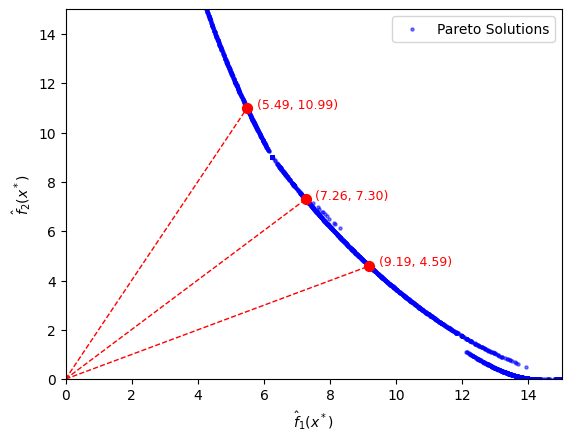

In [6]:
import matplotlib.pyplot as plt
import numpy as np

if pareto_solutions:
    # Unpack mean (m), std dev (s), and solutions (x) from Pareto solutions
    m_values, s_values, x_values = zip(*pareto_solutions)

    # Plot all Pareto solutions as blue semi-transparent dots
    plt.scatter(m_values, s_values, s=5, color='b', alpha=0.5, label='Pareto Solutions')

    # Representative points for each ratio (previously selected)
    special_points = [
        (7.2588, 7.2967),   # ratio approximately 1 (f1 ≈ f2)
        (9.1856, 4.5906),   # ratio approximately 2 (f1 ≈ 2 * f2)
        (5.4867, 10.9911)   # ratio approximately 0.5 (f1 ≈ 0.5 * f2)
    ]

    # Separate x and y coordinates of special points
    sp_m, sp_s = zip(*special_points)

    # Plot the special points as larger red circles
    plt.scatter(sp_m, sp_s, s=50, color='r', marker='o')

    origin = np.array([0, 0])

    # Draw dashed red lines from origin (0,0) to each special point
    for point in special_points:
        point_arr = np.array(point)
        plt.plot([origin[0], point_arr[0]], [origin[1], point_arr[1]], 'r--', linewidth=1)

        # Label each point with its (f1, f2) coordinates
        plt.text(point_arr[0] + 0.3, point_arr[1], f"({point_arr[0]:.2f}, {point_arr[1]:.2f})",
                 fontsize=9, color='r')

    # Label axes
    plt.ylabel(r"$\hat{f}_2(x^*)$")
    plt.xlabel(r"$\hat{f}_1(x^*)$")

    # Set limits for x and y axes
    plt.xlim(0, 15)
    plt.ylim(0, 15)

    # Show legend
    plt.legend()

    # Display the plot
    plt.show()


In [7]:
import numpy as np

special_points = [
    (7.2588, 7.2967),   # ratio ~ 1
    (9.1856, 4.5906),   # ratio ~ 2
    (5.4867, 10.9911)   # ratio ~ 0.5
]

x_for_special_points = []

for sp in special_points:
    sp_m, sp_s = sp
    min_dist = float('inf')
    closest_x = None
    for m_opt, s_opt, x_opt in pareto_solutions:
        dist = np.sqrt((m_opt - sp_m)**2 + (s_opt - sp_s)**2)
        if dist < min_dist:
            min_dist = dist
            closest_x = x_opt
    x_for_special_points.append(closest_x)

for i, x_val in enumerate(x_for_special_points):
    print(f"Special point {i+1} ({special_points[i][0]:.4f}, {special_points[i][1]:.4f}) corresponds to x = {x_val}")


Special point 1 (7.2588, 7.2967) corresponds to x = [1.         1.         0.90041624]
Special point 2 (9.1856, 4.5906) corresponds to x = [1.         1.         0.71419044]
Special point 3 (5.4867, 10.9911) corresponds to x = [1.         0.82748046 1.        ]


Solution 1: m = 0.60062, s = 1.35244, x = [ 1.         0.7092341 -1.       ]
Solution 2: m = 6.24770, s = 0.45092, x = [-0.99999715  0.99999906 -0.99999999]
Solution 3: m = 6.24771, s = 0.45092, x = [-1.  1. -1.]
Solution 4: m = 6.24771, s = 0.45092, x = [-1.  1. -1.]
Solution 5: m = 6.24771, s = 0.45092, x = [-1.  1. -1.]
Solution 6: m = 6.24771, s = 0.45092, x = [-1.  1. -1.]
Solution 7: m = 6.24771, s = 0.45092, x = [-1.  1. -1.]
Solution 8: m = 0.60067, s = 1.35237, x = [ 1.          0.71002527 -1.        ]
Solution 9: m = 0.60066, s = 1.35238, x = [ 1.          0.70991525 -1.        ]
Solution 10: m = 0.60068, s = 1.35235, x = [ 1.        0.710185 -1.      ]
Solution 11: m = 0.60064, s = 1.35239, x = [ 1.          0.70974071 -1.        ]
Solution 12: m = 0.60063, s = 1.35241, x = [ 1.          0.70956574 -1.        ]
Solution 13: m = 0.60063, s = 1.35242, x = [ 1.          0.70944494 -1.        ]
Solution 14: m = 0.60063, s = 1.35242, x = [ 1.          0.70948372 -1.        ]
Solu

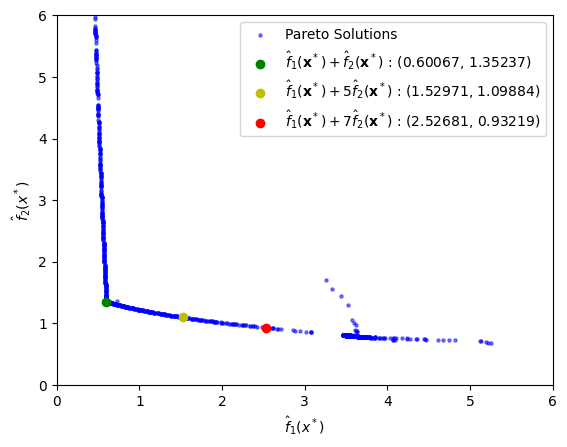

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Mean response function (m) and standard deviation function (s)
def mean_response(x):
    x1, x2, x3 = x
    y1_mu = 104.867 - 3.148*x1 + 2.379*x1*x2 - 0.35*x1*x3  # Equation (1)
    y2_mu = 70.4514 - 0.3488*x1 + 3.592*x2 - 0.449*x1*x3 + 0.6144*x2*x3  # Equation (2)

    # Calculate deviations from baseline values
    term1 = (y1_mu - 103)**2
    term2 = (y1_mu - 103) * (y2_mu - 73)
    term3 = 2.5 * (y2_mu - 73)**2

    # Final expression result
    result = term1 + term2 + term3
    return result

def std_dev_response(x):
    x1, x2, x3 = x
    y1r_sq = (1.613 - 0.254 * x2 + 1.25 * x3)**2
    y2r_sq = 2.5 * (1.7288 + 0.417 * x1 + 1.214 * x3 + 0.2625 * x1 * x3)**2

    # Twice the covariance term
    cov_2x = (3.7118 + 1.2034 * x1 + 3.5550 * x3 + 1.1611 * x1 * x3)

    # Final standard deviation expression
    result = y1r_sq + y2r_sq + cov_2x
    return result

# Objective function: minimize m^p1 + s^p2 (multi-objective weighted sum)
def objective(x, p1, p2):
    return (abs(mean_response(x)) / 188.641)**p1 + (abs(std_dev_response(x)) / 63.5602)**p2

# Optimization problem setup
bounds = [(-1, 1), (-1, 1), (-1, 1)]
initial_x = [0, 0, 0]

# List to store Pareto optimal solutions
pareto_solutions = []

# Try various combinations of weights p1 and p2
p1_values = np.arange(0.05, 3, 0.05)
p2_values = np.arange(0.05, 3, 0.05)

for p1 in p1_values:
    for p2 in p2_values:
        result = minimize(objective, initial_x, args=(p1, p2), bounds=bounds, method='SLSQP')

        if result.success:
            m_opt = mean_response(result.x)
            s_opt = std_dev_response(result.x)
            x_opt = result.x  # Save the optimized x value
            pareto_solutions.append((m_opt, s_opt, x_opt))

# Print all found solutions
for i, (m, s, x) in enumerate(pareto_solutions):
    print(f"Solution {i+1}: m = {m:.5f}, s = {s:.5f}, x = {x}")

# Find solution minimizing m + s
min_sum_solution = min(pareto_solutions, key=lambda tup: tup[0] + tup[1])
m_min, s_min, x_min = min_sum_solution

print("\n✅ Solution minimizing m + s:")
print(f"m = {m_min:.5f}, s = {s_min:.5f}, m + s = {m_min + s_min:.5f}, x = {x_min}")

# Find solution minimizing m + 5*s
min_weighted_sum_solution = min(pareto_solutions, key=lambda tup: tup[0] + tup[1]*5)
m_wmin, s_wmin, x_wmin = min_weighted_sum_solution

print("\n✅ Solution minimizing m + 5s:")
print(f"m = {m_wmin:.5f}, s = {s_wmin:.5f}, m + 5s = {m_wmin + s_wmin*5:.5f}, x = {x_wmin}")

# Find solution minimizing m + 7*s
min_weighted_sum_solution = min(pareto_solutions, key=lambda tup: tup[0] + tup[1]*7)
m_wmin2, s_wmin2, x_wmin2 = min_weighted_sum_solution

print("\n✅ Solution minimizing m + 7s:")
print(f"m = {m_wmin2:.5f}, s = {s_wmin2:.5f}, m + 7s = {m_wmin2 + s_wmin2*7:.5f}, x = {x_wmin2}")

# Find solution minimizing m alone
min_m_solution = min(pareto_solutions, key=lambda tup: tup[0])
m_only_min, s_at_m_min, x_at_m_min = min_m_solution

print("\n✅ Solution minimizing m only:")
print(f"m = {m_only_min:.5f}, s = {s_at_m_min:.5f}, x = {x_at_m_min}")

# Visualization of solutions
if pareto_solutions:
    m_values, s_values, x_values = zip(*pareto_solutions)
    m_values = [abs(m) for m in m_values]

    # Plot Pareto front points
    plt.scatter(m_values, s_values, s=5, color='b', alpha=0.5, label='Pareto Solutions')

    # Highlight the selected optimal points
    plt.scatter(m_min, s_min, color='g', label=fr"$\hat{{f}}_1(\mathbf{{x}}^*) + \hat{{f}}_2(\mathbf{{x}}^*)$ : ({m_min:.5f}, {s_min:.5f})", zorder=5)
    plt.scatter(m_wmin, s_wmin, color='y', label=fr"$\hat{{f}}_1(\mathbf{{x}}^*) + 5\hat{{f}}_2(\mathbf{{x}}^*)$ : ({m_wmin:.5f}, {s_wmin:.5f})", zorder=5)
    plt.scatter(m_wmin2, s_wmin2, color='r', label=fr"$\hat{{f}}_1(\mathbf{{x}}^*) + 7\hat{{f}}_2(\mathbf{{x}}^*)$ : ({m_wmin2:.5f}, {s_wmin2:.5f})", zorder=5)

    # Configure plot labels and limits
    plt.ylabel("$\hat{f}_2(x^*)$")
    plt.xlabel("$\hat{f}_1(x^*)$")
    plt.xlim(0, 6)
    plt.ylim(0, 6)
    plt.legend()
    plt.show()


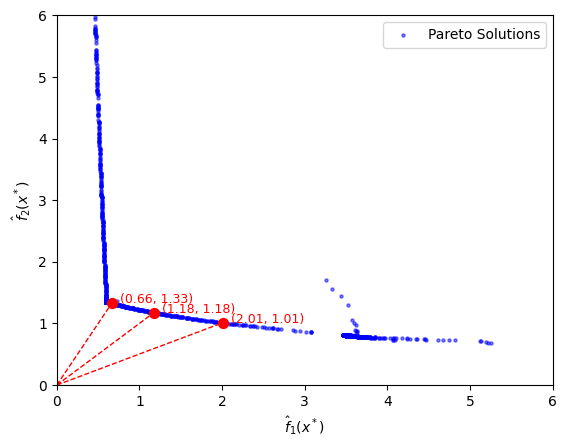

Ratio ~ 1: m = 1.17502, s = 1.17692, x = [ 0.67355501  0.7016308  -1.        ]
Ratio ~ 2: m = 2.00761, s = 1.01196, x = [ 0.34560126  0.70934798 -1.        ]
Ratio ~ 0.5: m = 0.66447, s = 1.32791, x = [ 0.95607725  0.71005602 -1.        ]


In [9]:
import numpy as np
import matplotlib.pyplot as plt

if pareto_solutions:
    # Unpack the solutions into separate lists and take absolute values of m (mean)
    m_values, s_values, x_values = zip(*pareto_solutions)
    m_values = np.abs(m_values)

    # Target ratios of m/s to highlight
    target_ratios = [1, 2, 0.5]

    special_points = []
    special_x = []

    # For each target ratio, find the closest solution with that ratio of m/s
    for r in target_ratios:
        idx = np.argmin(np.abs(np.array(m_values) / np.array(s_values) - r))
        special_points.append((m_values[idx], s_values[idx]))
        special_x.append(x_values[idx])  # Save corresponding x values too

    # Plot all Pareto solutions
    sp_m, sp_s = zip(*special_points)
    plt.scatter(m_values, s_values, s=5, color='b', alpha=0.5, label='Pareto Solutions')
    # Highlight special points in red
    plt.scatter(sp_m, sp_s, s=50, color='r', marker='o')

    origin = np.array([0, 0])
    for i, point in enumerate(special_points):
        point_arr = np.array(point)
        # Draw dashed line from origin to each special point
        plt.plot([origin[0], point_arr[0]], [origin[1], point_arr[1]], 'r--', linewidth=1)
        # Label each special point with its coordinates
        plt.text(point_arr[0] + 0.1, point_arr[1], f"({point_arr[0]:.2f}, {point_arr[1]:.2f})", fontsize=9, color='r')

    # Axis labels and limits
    plt.ylabel("$\hat{f}_2(x^*)$")
    plt.xlabel("$\hat{f}_1(x^*)$")
    plt.xlim(0, 6)
    plt.ylim(0, 6)
    plt.legend()
    plt.show()

    # Print the x values and corresponding m, s for each highlighted ratio point
    for ratio, x_val, (m_val, s_val) in zip(target_ratios, special_x, special_points):
        print(f"Ratio ~ {ratio}: m = {m_val:.5f}, s = {s_val:.5f}, x = {x_val}")


Solution 1: m = 0.60062, s = 1.35244, x = [ 1.         0.7092341 -1.       ]
Solution 2: m = 6.24770, s = 0.45092, x = [-0.99999715  0.99999906 -0.99999999]
Solution 3: m = 6.24771, s = 0.45092, x = [-1.  1. -1.]
Solution 4: m = 6.24771, s = 0.45092, x = [-1.  1. -1.]
Solution 5: m = 6.24771, s = 0.45092, x = [-1.  1. -1.]
Solution 6: m = 6.24771, s = 0.45092, x = [-1.  1. -1.]
Solution 7: m = 6.24771, s = 0.45092, x = [-1.  1. -1.]
Solution 8: m = 0.60067, s = 1.35237, x = [ 1.          0.71002527 -1.        ]
Solution 9: m = 0.60066, s = 1.35238, x = [ 1.          0.70991525 -1.        ]
Solution 10: m = 0.60068, s = 1.35235, x = [ 1.        0.710185 -1.      ]
Solution 11: m = 0.60064, s = 1.35239, x = [ 1.          0.70974071 -1.        ]
Solution 12: m = 0.60063, s = 1.35241, x = [ 1.          0.70956574 -1.        ]
Solution 13: m = 0.60063, s = 1.35242, x = [ 1.          0.70944494 -1.        ]
Solution 14: m = 0.60063, s = 1.35242, x = [ 1.          0.70948372 -1.        ]
Solu

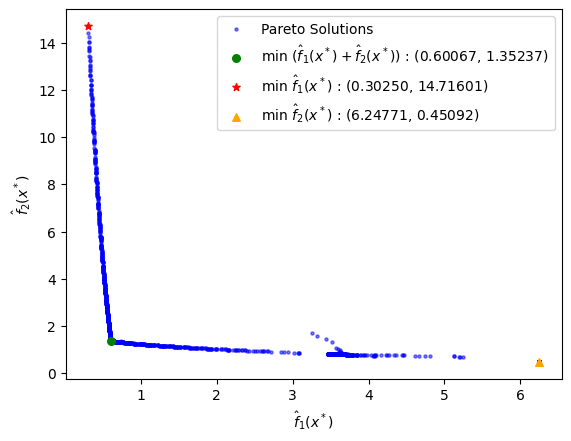

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Mean response function (m)
def mean_response(x):
    x1, x2, x3 = x
    # Equation (1)
    y1_mu = 104.867 - 3.148*x1 + 2.379*x1*x2 - 0.35*x1*x3
    # Equation (2)
    y2_mu = 70.4514 - 0.3488*x1 + 3.592*x2 - 0.449*x1*x3 + 0.6144*x2*x3

    # Compute squared deviations and covariance related terms
    term1 = (y1_mu - 103)**2
    term2 = (y1_mu - 103) * (y2_mu - 73)
    term3 = 2.5 * (y2_mu - 73)**2

    # Final combined mean response value
    result = term1 + term2 + term3
    return result

# Standard deviation response function (s)
def std_dev_response(x):
    x1, x2, x3 = x
    y1r_sq = (1.613 - 0.254 * x2 + 1.25 * x3)**2
    y2r_sq = 2.5 * (1.7288 + 0.417 * x1 + 1.214 * x3 + 0.2625 * x1 * x3)**2

    # Twice the covariance expression
    cov_2x = (3.7118 + 1.2034 * x1 + 3.5550 * x3 + 1.1611 * x1 * x3)

    # Final combined standard deviation value
    result = y1r_sq + y2r_sq + cov_2x
    return result

# Objective function to minimize: weighted sum of mean_response^p1 and std_dev_response^p2
def objective(x, p1, p2):
    # Normalize mean_response by 188.641 and std_dev_response by 63.5602 as given
    return (abs(mean_response(x)) / 188.641)**p1 + (abs(std_dev_response(x)) / 63.5602)**p2

# Define variable bounds for x1, x2, x3
bounds = [(-1, 1), (-1, 1), (-1, 1)]
initial_x = [0, 0, 0]

# List to store Pareto optimal solutions (m, s, x)
pareto_solutions = []

# Grid search over powers p1 and p2 from 0.05 to 3 in steps of 0.05
p1_values = np.arange(0.05, 3, 0.05)
p2_values = np.arange(0.05, 3, 0.05)

# Run optimization for every combination of p1 and p2
for p1 in p1_values:
    for p2 in p2_values:
        result = minimize(objective, initial_x, args=(p1, p2), bounds=bounds, method='SLSQP')

        if result.success:
            m_opt = mean_response(result.x)
            s_opt = std_dev_response(result.x)
            x_opt = result.x
            pareto_solutions.append((m_opt, s_opt, x_opt))

# Print all solutions found
for i, (m, s, x) in enumerate(pareto_solutions):
    print(f"Solution {i+1}: m = {m:.5f}, s = {s:.5f}, x = {x}")

# Find solution minimizing sum m + s
min_sum_solution = min(pareto_solutions, key=lambda tup: tup[0] + tup[1])
m_min, s_min, x_min = min_sum_solution

print("\n✅ Solution minimizing m + s:")
print(f"m = {m_min:.5f}, s = {s_min:.5f}, m + s = {m_min + s_min:.5f}, x = {x_min}")

# Find solution minimizing m alone
min_m_solution = min(pareto_solutions, key=lambda tup: tup[0])
m_only_min, s_at_m_min, x_at_m_min = min_m_solution

print("\n✅ Solution minimizing m alone:")
print(f"m = {m_only_min:.5f}, s = {s_at_m_min:.5f}, x = {x_at_m_min}")

# Find solution minimizing s alone
min_s_solution = min(pareto_solutions, key=lambda tup: tup[1])
m_at_s_min, s_only_min, x_at_s_min = min_s_solution

print("\n✅ Solution minimizing s alone:")
print(f"m = {m_at_s_min:.5f}, s = {s_only_min:.5f}, x = {x_at_s_min}")

# Visualization of results
if pareto_solutions:
    m_values, s_values, x_values = zip(*pareto_solutions)
    m_values = [abs(m) for m in m_values]  # Absolute values for plotting

    # Plot all Pareto solutions in blue
    plt.scatter(m_values, s_values, s=5, color='b', alpha=0.5, label='Pareto Solutions')

    # Highlight solution minimizing m + s in green
    plt.scatter(m_min, s_min, color='g', s=30,
                label=fr"min ($\hat{{f}}_1(x^*)+\hat{{f}}_2(x^*)$) : ({m_min:.5f}, {s_min:.5f})", zorder=5)

    # Highlight solution minimizing m alone in red star
    plt.scatter(m_only_min, s_at_m_min, color='r', marker='*', s=30,
                label=fr"min $\hat{{f}}_1(x^*)$ : ({m_only_min:.5f}, {s_at_m_min:.5f})", zorder=5)

    # Highlight solution minimizing s alone in orange triangle
    plt.scatter(m_at_s_min, s_only_min, color='orange', marker='^', s=30,
                label=fr"min $\hat{{f}}_2(x^*)$ : ({m_at_s_min:.5f}, {s_only_min:.5f})", zorder=5)

    plt.ylabel("$\hat{f}_2(x^*)$")
    plt.xlabel("$\hat{f}_1(x^*)$")
    plt.legend()
    plt.show()


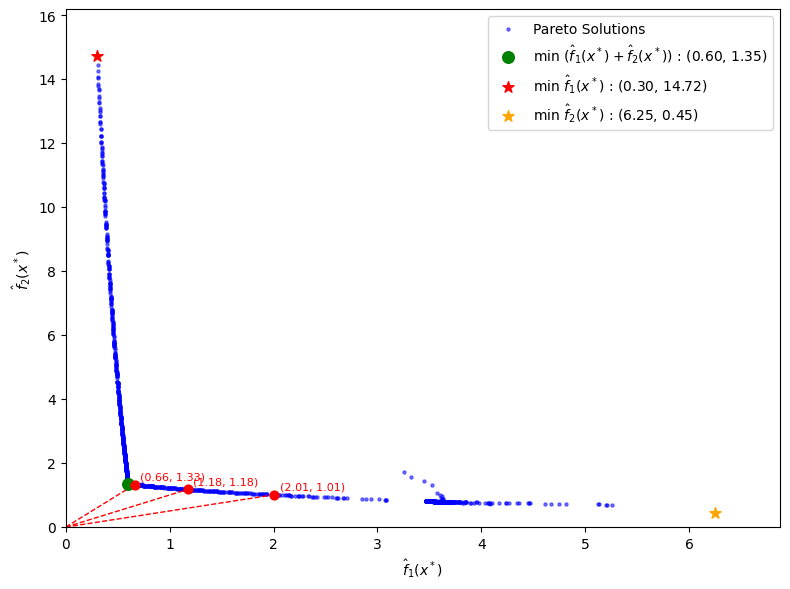


✅ Minimum m + s: m = 0.60067, s = 1.35237, x = [ 1.          0.71001337 -1.        ]
✅ Minimum m alone: m = 0.30250, s = 14.71601, x = [ 1.          0.74382614 -0.16269989]
✅ Minimum s alone: m = 6.24771, s = 0.45092, x = [-1.  1. -1.]

📌 Ratio ~    1: m = 1.17502, s = 1.17692, x = [ 0.67355501  0.7016308  -1.        ]
📌 Ratio ~    2: m = 2.00761, s = 1.01196, x = [ 0.34560126  0.70934798 -1.        ]
📌 Ratio ~  0.5: m = 0.66447, s = 1.32791, x = [ 0.95607725  0.71005602 -1.        ]


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Mean response function
def mean_response(x):
    x1, x2, x3 = x
    y1_mu = 104.867 - 3.148*x1 + 2.379*x1*x2 - 0.35*x1*x3
    y2_mu = 70.4514 - 0.3488*x1 + 3.592*x2 - 0.449*x1*x3 + 0.6144*x2*x3
    term1 = (y1_mu - 103)**2
    term2 = (y1_mu - 103) * (y2_mu - 73)
    term3 = 2.5 * (y2_mu - 73)**2
    return term1 + term2 + term3

# Standard deviation response function
def std_dev_response(x):
    x1, x2, x3 = x
    y1r_sq = (1.613 - 0.254 * x2 + 1.25 * x3)**2
    y2r_sq = 2.5 * (1.7288 + 0.417 * x1 + 1.214 * x3 + 0.2625 * x1 * x3)**2
    cov_2x = (3.7118 + 1.2034 * x1 + 3.5550 * x3 + 1.1611 * x1 * x3)
    return y1r_sq + y2r_sq + cov_2x

# Objective function to minimize: weighted sum of normalized mean and std dev powered by p1 and p2
def objective(x, p1, p2):
    return (abs(mean_response(x)) / 188.641)**p1 + (abs(std_dev_response(x)) / 63.5602)**p2

# Bounds and initial guess for optimization variables
bounds = [(-1, 1), (-1, 1), (-1, 1)]
initial_x = [0, 0, 0]

# List to store Pareto optimal solutions (mean, std dev, x)
pareto_solutions = []

# Grid search for powers p1 and p2 in [0.05, 3) with step 0.05
p1_values = np.arange(0.05, 3, 0.05)
p2_values = np.arange(0.05, 3, 0.05)

for p1 in p1_values:
    for p2 in p2_values:
        result = minimize(objective, initial_x, args=(p1, p2), bounds=bounds, method='SLSQP')
        if result.success:
            m = mean_response(result.x)
            s = std_dev_response(result.x)
            pareto_solutions.append((m, s, result.x))

# Find solutions minimizing m + s, m alone, and s alone
m_min, s_min, x_min = min(pareto_solutions, key=lambda t: t[0] + t[1])
m_only_min, s_at_m_min, x_at_m_min = min(pareto_solutions, key=lambda t: t[0])
m_at_s_min, s_only_min, x_at_s_min = min(pareto_solutions, key=lambda t: t[1])

# Find special points by ratio m/s approximately equal to 1, 2, and 0.5
target_ratios = [1, 2, 0.5]
special_points = []
special_x = []

m_values, s_values, x_values = zip(*pareto_solutions)
m_values = np.abs(np.array(m_values))  # Take absolute values for ratio calculation
s_values = np.array(s_values)

for r in target_ratios:
    idx = np.argmin(np.abs(m_values / s_values - r))
    special_points.append((m_values[idx], s_values[idx]))
    special_x.append(x_values[idx])

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(m_values, s_values, s=5, color='b', alpha=0.5, label='Pareto Solutions')

# Mark solutions minimizing m+s, m alone, s alone
plt.scatter(m_min, s_min, color='g', s=70,
            label=fr"min ($\hat{{f}}_1(x^*)+\hat{{f}}_2(x^*)$) : ({m_min:.2f}, {s_min:.2f})", zorder=5)
plt.scatter(m_only_min, s_at_m_min, color='r', marker='*', s=70,
            label=fr"min $\hat{{f}}_1(x^*)$ : ({m_only_min:.2f}, {s_at_m_min:.2f})", zorder=5)
plt.scatter(m_at_s_min, s_only_min, color='orange', marker='*', s=70,
            label=fr"min $\hat{{f}}_2(x^*)$ : ({m_at_s_min:.2f}, {s_only_min:.2f})", zorder=5)

# Mark special points based on ratio criteria
sp_m, sp_s = zip(*special_points)
plt.scatter(sp_m, sp_s, color='red', marker='o', s=40, zorder=5)

# Draw dashed lines and label the special points
for i, point in enumerate(special_points):
    pt = np.array(point)
    plt.plot([0, pt[0]], [0, pt[1]], 'r--', linewidth=1)
    plt.text(pt[0] + 0.05, pt[1] + 0.15, f"\n({pt[0]:.2f}, {pt[1]:.2f})",
             fontsize=8, color='r')

plt.xlabel("$\hat{f}_1(x^*)$")
plt.ylabel("$\hat{f}_2(x^*)$")
plt.xlim(0, max(m_values) * 1.1)
plt.ylim(0, max(s_values) * 1.1)
plt.legend()
plt.tight_layout()
plt.show()

# Print results in console
print(f"\n✅ Minimum m + s: m = {m_min:.5f}, s = {s_min:.5f}, x = {x_min}")
print(f"✅ Minimum m alone: m = {m_only_min:.5f}, s = {s_at_m_min:.5f}, x = {x_at_m_min}")
print(f"✅ Minimum s alone: m = {m_at_s_min:.5f}, s = {s_only_min:.5f}, x = {x_at_s_min}\n")

for ratio, x_val, (m_val, s_val) in zip(target_ratios, special_x, special_points):
    print(f"📌 Ratio ~ {ratio:>4}: m = {m_val:.5f}, s = {s_val:.5f}, x = {x_val}")


In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Define the data
data = [
    [ 1, 1, 1, [104.454, 105.029, 99.786, 104.923], [76.9003, 77.0322, 67.989, 75.7691]],
    [ 1, 1, -1, [104.12, 104.802, 104.203, 104.335], [72.9878, 74.2487, 73.9371, 73.2824]],
    [ 1, -1, 1, [98.732, 99.357, 102.842, 94.235], [67.0955, 63.6112, 68.647, 62.4188]],
    [ 1, -1, -1, [100.192, 99.634, 100.269, 100.6], [67.0264, 66.1779, 66.5758, 67.9431]],
    [ -1, 1, 1, [103.145, 106.959, 107.62, 103.44], [71.6818, 76.2657, 77.4958, 76.3739]],
    [ -1, 1, -1, [106.078, 105.642, 105.67, 105.393], [72.9353, 72.8508, 72.5768, 72.3754]],
    [ -1, -1, 1, [113.515, 111.121, 112.854, 106.666], [68.2934, 68.4693, 68.9576, 64.7051]],
    [ -1, -1, -1, [109.895, 109.759, 110.704, 109.773], [67.6974, 67.2374, 67.962, 66.9268]],
]

# Function to compute covariance
def compute_cov(y1, y2):
    return np.cov(y1, y2, ddof=1)[0, 1]

# Organize data
rows = []
for row in data:
    x1, x2, x3, y1_vals, y2_vals = row[0:]
    cov = compute_cov(y1_vals, y2_vals)
    rows.append({
        'x1': x1,
        'x2': x2,
        'x3': x3,
        'x1_x2': x1 * x2,
        'x1_x3': x1 * x3,
        'x2_x3': x2 * x3,
        'x1_x2_x3': x1 * x2 * x3,
        'cov': cov
    })

df = pd.DataFrame(rows)

# Independent variables and dependent variable
X = df[['x1', 'x3', 'x1_x3']]
y = df['cov']

# Linear regression model using sklearn
model = LinearRegression()
model.fit(X, y)

# Print results
print("Regression coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared:", model.score(X, y))

import statsmodels.api as sm

# statsmodels requires adding a constant term explicitly
X_sm = sm.add_constant(X)  # add constant term
model_sm = sm.OLS(y, X_sm)  # create OLS regression model
results = model_sm.fit()    # fit the model

# Print regression summary
print(results.summary())


Regression coefficients: [1.20339861 3.55498748 1.16113142]
Intercept: 3.711752013541667
R-squared: 0.9726450480332622
                            OLS Regression Results                            
Dep. Variable:                    cov   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     47.41
Date:                Mon, 30 Jun 2025   Prob (F-statistic):            0.00139
Time:                        07:24:47   Log-Likelihood:                -8.0134
No. Observations:                   8   AIC:                             24.03
Df Residuals:                       4   BIC:                             24.34
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.
  return hypotest_fun_in(*args, **kwds)
